# Sklearn
# Performance d'un classifieur
# Arbres de décision 1



# 1. Créer un classifieur avec sklearn

## Données : le dataset Iris

In [500]:
from IPython.core.display import Image, display
display(Image('https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg', width=500))

/Users/Pierre/anaconda/lib/python3.6/site-packages/IPython/core/formatters.py:337: FormatterWarning: image/jpeg formatter returned invalid type <class 'tuple'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

On récupère un des datasets nativement présents dans sklearn : le dataset Iris

In [501]:
from sklearn.datasets import load_iris
iris = load_iris()

L'objet renvoyé par load_iris() contient plusieurs champs : 

Le nom des attributs :

In [502]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Le nom des classes

In [503]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Et les données : 
- iris.data : un tableau 2D avec les exemples (sans les classes) 
- iris.target : un tableau 1D pour les classes correspondantes

In [504]:
type(iris.data), iris.data.shape

(numpy.ndarray, (150, 4))

In [505]:
type(iris.target), iris.target.shape

(numpy.ndarray, (150,))

On vérifie le format de description d'un exemple (une ligne quelconque) : 

In [506]:
iris.data[56],iris.target[56]

(array([ 6.3,  3.3,  4.7,  1.6]), 1)

Ce qui signifie : l'exemple n°56 est un iris de dimension (6.3,  3.3,  4.7,  1.6) qui est un iris versicolor (classe=1)

Exercice : combien y a t il d'exemples de chaque classe présents dans la base ?

In [507]:
#votre réponse 

SOLUTION 1

In [508]:
[print('classe ',i,' : ',sum(iris.target==i)) for i in range(3)]

classe  0  :  50
classe  1  :  50
classe  2  :  50


[None, None, None]

SOLUTION 2

In [509]:
from collections import Counter 
dict=Counter(iris.target)
dict

Counter({0: 50, 1: 50, 2: 50})

La base contient donc 50 samples de chaque classe. 

## Construire le classifieur

Tous les classifieurs se construisent de la même façon : le classifieur est appris par la fonction fit(.).
Traditionnellement, x désigne les exemples tandis que y désigne les classes (ou target, ou label)

In [510]:
from sklearn.tree import DecisionTreeClassifier

x=iris.data
y=iris.target

#clf = DecisionTreeClassifier().fit(x,y)
clf = DecisionTreeClassifier().fit(x,y)

#Un autre type de classifieur : le réseau de neuronnes

## Utiliser le classifieur pour prédire une classe

On veut prédire la classe d'une fleur de dimension [ 6.1,  1.5,  2.4,  0.9]

In [511]:
new=[ 6.1,  1.5,  2.4,  0.9]
clf.predict([new])

array([1])

La prédiction vaut 1, c'est à dire qu'un iris de dimensions [ 6.1,  1.5,  2.4,  0.9] est de type versicolor (classe=1)

Vérifier que la prédiction est la même en utilisant un autre classifieur  (MLP ou autre)

In [512]:
#from sklearn.neural_network import MLPClassifier
#clf2 = MLPClassifier().fit(x,y)

#votre réponse
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier().fit(x,y)
clf2.predict([new])

#from sklearn.linear_model import PassiveAggressiveClassifier
#clf3 = PassiveAggressiveClassifier().fit(x,y)
#clf3.predict([new])

/Users/Pierre/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


array([1])

Utililser le classifieur (celui de l'arbre de décision) pour prédire la classe de tous les exemples (iris.data). On notera y_pred le tableau 1D des classes prédites.  

In [513]:
#votre réponse
y_pred=clf.predict(iris.data)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 2. Evaluer les performances d'un classifieur

On souhaite maintenant coder la fonction d'évaluation de la performance (accuracy), qui désigne la proportion de prédictions correctes. Et tester cette fonction sur le résultat du classifieur. 


In [514]:
def accuracy(y_pred,y):
    return sum(y_pred==y) / len(y)

In [515]:
#votre réponse
print(accuracy(y_pred, y))
# 1.0 => 100% de bonnes prédictions => On a prédit sur les mêmes données
# Construire le Classifier avec X et Y => Prédit sur X (y_pred) donc on retrouve forcément Y

1.0


Pouvez vous expliquer le résultat ?

reponse

Afin d'évaluer le classifieur sur des DONNEES NON VUES, on a besoin de diviser les données initiales en 4 ensembles : 

- x_train et y_train : l'ensemble dit d'apprentissage, utilisé pour construire le classifieur (fit).
- x_test et y_test : l'ensemble dit de test, utilisé pour calculer la performance du classifieur sur des DONNEES NON VUES. 

Coder une fonction data_split(x, y, prob) permettant de diviser les données initiales (x et y) en  4 tableaux  x_train, x_test, y_train, y_test. (un tuple à renvoyer)
Le paramètre prob est un float compris entre 0 et 1 et désigne la probabilité qu'une ligne fasse partie, ou non, de l'ensemble d'apprentissage. Le ratio len(x_train)/len(x_test) sera donc sujet à variation au cours des appels.  

Indice Python : vous aurez besoin de zip et de l'opérateur de déballage (*)

In [516]:
x=['a','b','c']
y=[1,2,3]
l=list(zip(x,y))
l

[('a', 1), ('b', 2), ('c', 3)]

In [517]:
list(zip(*l))

[('a', 'b', 'c'), (1, 2, 3)]

In [518]:
def data_split(x, y, prob):
    import random
    x_train, y_train, x_test, y_test = [], [], [], []
    train, test = [], []
    d = zip(x, y)
    for line in d:
        if(random.random() < prob):
            train.append(line)
        else:
            test.append(line)
    
    x_train, y_train = list(zip(*train))
    x_test, y_test = list(zip(*test))
    
    return x_train, y_train, x_test, y_test

Mesurer à nouveau la performance du classifieur (mais sur l'ensemble de test cette fois)

In [528]:
#print(data_split(x, y, 0.5))

x = iris.data
y = iris.target
x_train, y_train, x_test, y_test = data_split(x, y, .5)

clf = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1
 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]


Regarder si la valeur de performance est stable sur plusieurs appels (calculer moyenne et ecart type). 
Bonus : visualiser la distribution de cette valeur. 

0.944031742414


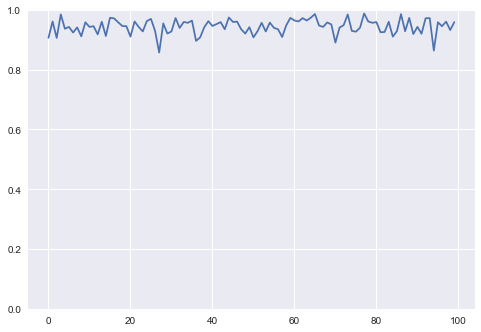

In [520]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
#votre réponse
res = []
for i in range(100):
    x_train, y_train, x_test, y_test = data_split(x, y, .5)
    clf = DecisionTreeClassifier().fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    res.append(accuracy(y_pred, y_test))

moy = sum(res) / len(res)
print(moy)

plt.ylim([0, 1])
plt.plot(range(100), res)

# 3. Visualiser un arbre de décision

Les arbre de décision présentent l'avantage (vis à vis des autres classifieurs) de pouvoir être représentés visuellement : sous la forme d'un arbre

In [521]:
#!pip install export_graphviz
from sklearn.tree import export_graphviz

with open("tree.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                        feature_names=iris.feature_names,
                        filled=True)

Après avoir installé Graphviz 
http://www.graphviz.org/Download..php
et ajouté le repértoire de dot.exe à votre PATH:

In [522]:
!dot -Tpng tree.dot -o tree.png 

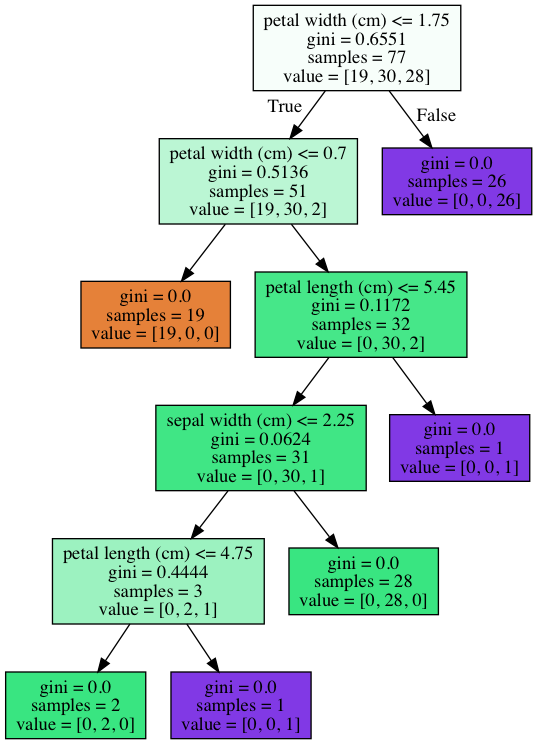

In [523]:
display(Image('tree.png'))

# 4. sklearn.tree.DecisionTreeClassifier

### max_depth

Le niveau de profondeur maximal de l'arbre de décision est accessible via un paramètre max_depth du constructeur de DecisionTreeClassifier. 
Afficher les arbres pour max_depth = 3, 5, 9.

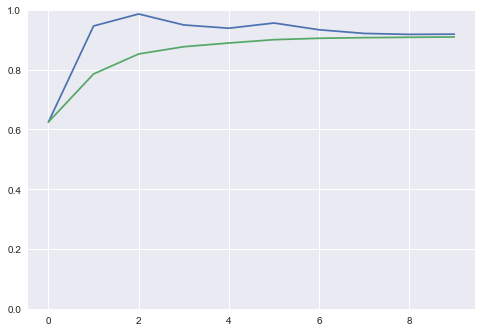

In [545]:
res = []
aa = []

for i in range(10):
    x = iris.data
    y = iris.target
    x_train, y_train, x_test, y_test = data_split(x, y, .5)

    clf = DecisionTreeClassifier(max_depth=i+1).fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    res.append(accuracy(y_pred, y_test))
    aa.append(sum(res) / len(res))
    
plt.ylim(0, 1)
plt.plot(range(10)-$)res)
plt.plot(range(10), aa)

A partir des arbres, trouver un exemple (fictif) qui est bien classé quand max_depth vaut 9 mais pas 3. Varifier-le. 

In [536]:
#votre réponse 

Est-ce une erreur grave ?

votre réponse 

On souhaite maintenant pouvoir visualiser la relation entre la valeur de max_depth et les performances du classifieur. 
Sur un graphique prenant en abscisse la valeur de max_depth  (de 1 à 10) et en ordonnée les performances du classifieur, on tracera 2 courbes représentant la performances du classifieur : 
- sur l'ensemble de test
- sur l'ensemble d'apprentissage

Ajouter les labels sur les axes et une légende. 

Bonus : faire de même avec le paramètre min_samples_split

In [526]:
#votre réponse 

Quel est selon vous le meilleur valeur pour le paramètre max_depth (dans l'optique de prédire correctement des données non vues) ? 

Bonus : Comparer votre résultat avec celui d'un gridsearch : sklearn.model_selection.GridSearchCV


In [527]:
#votre réponse 